In [186]:
import os
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data frame for the data.
import seaborn as sns # plotting.
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split # for splitting the dataset into train and test set

### Read dataset

In [187]:

dataset = pd.read_csv('dataset2.csv')

### display dataset

In [188]:
true_values = dataset['WIND-DIRECTION']
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,NaN,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,NaN,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,NaN,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,NaN,43,1010.5
4,May-95,36.8,25.7,155,3.0,NaN,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


In [192]:
median =dataset['WIND-RUN'].median()
median
dataset["WIND-RUN"].fillna(median, inplace=True)

In [194]:
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,47.6,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,47.6,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,47.6,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,47.6,43,1010.5
4,May-95,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


### dataset characteristics

In [195]:

dataset.describe()

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,35.168868,23.039937,165.679245,3.449686,47.726101,53.556604,1011.990566
std,3.219431,3.183020,54.287681,1.456645,7.425995,21.502584,3.587883
min,28.500000,13.900000,58.000000,0.000000,18.900000,11.000000,1002.300000
25%,32.200000,21.000000,120.000000,2.225000,47.600000,32.000000,1010.400000
50%,35.000000,23.600000,163.500000,3.000000,47.600000,54.000000,1013.200000
75%,37.300000,25.000000,204.750000,4.000000,47.600000,75.000000,1014.300000
max,41.900000,29.400000,307.000000,12.000000,98.300000,85.000000,1036.000000


### Check for null and NaN values

In [196]:

dataset.isna().sum()

DATE                   113
MAXIMUM-TEMPERATURE      0
MINIMUM-TEMPERATURE      0
WIND-DIRECTION           0
WIND-SPEED               0
WIND-RUN                 0
RELATIVE-HUMIDITY        0
AIR-PRESSURE             0
dtype: int64

### copy dataset

In [197]:

df = dataset[:]

### remove the date and wind-run column

In [198]:

del df['DATE']

In [199]:
df

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,33.3,16.4,73,2.0,47.6,27,1014.5
1,35.9,18.6,123,3.0,47.6,23,1013.7
2,40.5,25.0,191,3.0,47.6,32,1009.1
3,40.1,27.2,196,4.0,47.6,43,1010.5
4,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...
313,36.0,22.4,170,3.4,63.7,26,1006.9
314,39.7,26.1,220,2.1,73.7,35,1005.6
315,39.7,28.8,200,4.6,84.2,65,1002.6
316,35.6,25.3,130,2.6,98.3,75,1005.4


In [200]:
df.isna().sum()

MAXIMUM-TEMPERATURE    0
MINIMUM-TEMPERATURE    0
WIND-DIRECTION         0
WIND-SPEED             0
WIND-RUN               0
RELATIVE-HUMIDITY      0
AIR-PRESSURE           0
dtype: int64

In [201]:
print(f'Number of rows and columns in the dataset: {df.shape}')

Number of rows and columns in the dataset: (318, 7)


### Summary of information on the dataset.

In [202]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MAXIMUM-TEMPERATURE  318 non-null    float64
 1   MINIMUM-TEMPERATURE  318 non-null    float64
 2   WIND-DIRECTION       318 non-null    int64  
 3   WIND-SPEED           318 non-null    float64
 4   WIND-RUN             318 non-null    float64
 5   RELATIVE-HUMIDITY    318 non-null    int64  
 6   AIR-PRESSURE         318 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 17.5 KB


### Split the data into train/test splits

#### Split the data into 90% train and 10% test

In [203]:

train_dataset, test_dataset = train_test_split(df, test_size=0.1)

print( train_dataset.shape)
print( test_dataset.shape)

(286, 7)
(32, 7)


## Plot the relationship between each two variables to spot anything incorrect.

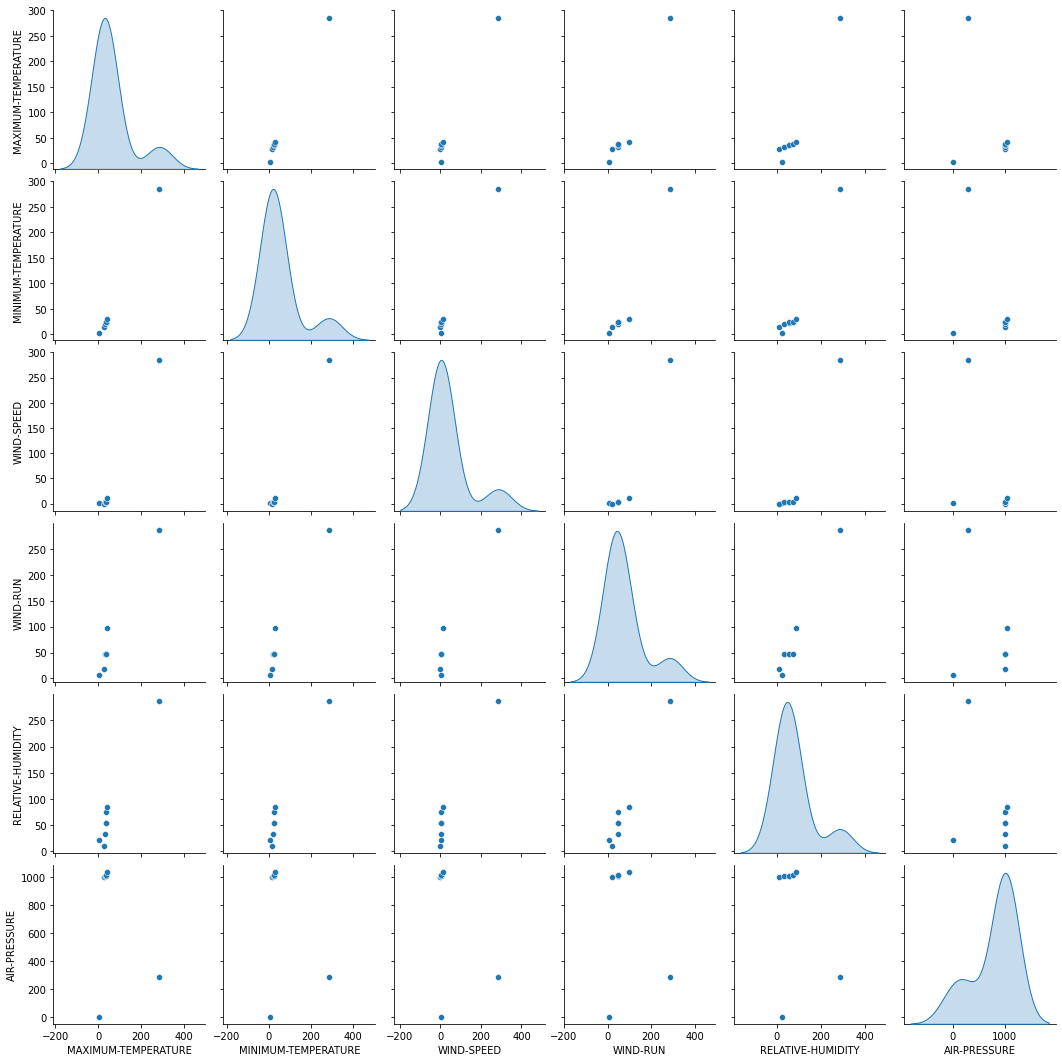

In [204]:

train_stats = train_dataset.describe()
train_stats.pop("WIND-DIRECTION")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

### Statistics on the train dataset to make sure it in a good shape

In [205]:

train_stats = train_dataset.describe()
wind_direction=train_stats.pop("WIND-DIRECTION")
train_stats = train_stats.transpose()
#train_stats
wind_direction

count    286.000000
mean     166.003497
std       54.444983
min       58.000000
25%      120.000000
50%      165.000000
75%      206.500000
max      307.000000
Name: WIND-DIRECTION, dtype: float64

## The label is "WIND-DIRECTION"

In [206]:
train_labels = train_dataset.pop('WIND-DIRECTION')
test_labels = test_dataset.pop('WIND-DIRECTION')

## Data Normalization/Scaling

In [207]:
cols_to_scale= ['MAXIMUM-TEMPERATURE','MINIMUM-TEMPERATURE','WIND-SPEED','RELATIVE-HUMIDITY','AIR-PRESSURE']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_dataset[cols_to_scale] = scaler.fit_transform(train_dataset[cols_to_scale])
test_dataset[cols_to_scale] = scaler.fit_transform(test_dataset[cols_to_scale])

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


## show a sample of the data after normalized

In [208]:

train_dataset.head(10)

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
82,0.634328,0.303226,0.166667,47.6,0.445946,0.338279
243,0.880597,0.658065,0.416667,47.6,0.418919,0.272997
45,0.343284,0.638710,0.250000,47.6,0.851351,0.332344
124,0.619403,0.800000,0.333333,47.6,0.689189,0.299703
252,0.365672,0.245161,0.158333,47.2,0.189189,0.097923
171,0.746269,0.870968,0.500000,47.6,0.445946,0.281899
260,0.201493,0.593548,0.141667,45.5,0.918919,0.163205
235,0.111940,0.625806,0.333333,47.6,0.932432,0.379822
308,0.223881,0.645161,0.091667,50.4,0.878378,0.183976
185,0.373134,0.690323,0.333333,47.6,0.797297,0.362018


## Build a Neural Network Model

### We declared a function for creating a model.

## import NN and other components.

In [209]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers

In [222]:
def model_multilayer_perceptron_with_four_hidden_layer():
    model =  keras.Sequential([
    keras.layers.Dense(25, input_dim=6, activation='relu'),
    keras.layers.Dense(35, activation='relu'),
    keras.layers.Dense(45, activation='relu'),
    keras.layers.Dense(55, activation='relu'),
    keras.layers.Dense(1,activation='linear')
    ])
    
    model.compile(loss='mse',optimizer=optimizers.RMSprop(0.001), metrics=['mae','mse','mape']) 
    return model

In [223]:
model3 = model_multilayer_perceptron_with_four_hidden_layer()
print('Here is a summary of this model: ')


model3.summary()


Here is a summary of this model: 
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_227 (Dense)            (None, 25)                175       
_________________________________________________________________
dense_228 (Dense)            (None, 35)                910       
_________________________________________________________________
dense_229 (Dense)            (None, 45)                1620      
_________________________________________________________________
dense_230 (Dense)            (None, 55)                2530      
_________________________________________________________________
dense_231 (Dense)            (None, 1)                 56        
Total params: 5,291
Trainable params: 5,291
Non-trainable params: 0
_________________________________________________________________


## Training the model we built above.

## Four hidden layer analysis

In [224]:

model = model_multilayer_perceptron_with_four_hidden_layer()
model.fit(train_dataset,train_labels,epochs=1500)

Epoch 1/1500
9/9 [==============================] - 11s 6ms/step - loss: 29349.8086 - mae: 162.3416 - mse: 29349.8086 - mape: 97.4132
Epoch 2/1500
9/9 [==============================] - 0s 3ms/step - loss: 25290.3398 - mae: 149.6013 - mse: 25290.3398 - mape: 88.9258
Epoch 3/1500
9/9 [==============================] - 0s 3ms/step - loss: 20674.6582 - mae: 132.8803 - mse: 20674.6582 - mape: 77.3334
Epoch 4/1500
9/9 [==============================] - 0s 4ms/step - loss: 15168.6035 - mae: 110.2497 - mse: 15168.6035 - mape: 62.0351
Epoch 5/1500
9/9 [==============================] - 0s 3ms/step - loss: 9455.9727 - mae: 82.3705 - mse: 9455.9727 - mape: 44.6265
Epoch 6/1500
9/9 [==============================] - 0s 4ms/step - loss: 5248.2446 - mae: 58.5489 - mse: 5248.2446 - mape: 33.0388
Epoch 7/1500
9/9 [==============================] - 0s 4ms/step - loss: 3550.7385 - mae: 49.1078 - mse: 3550.7385 - mape: 32.1853
Epoch 8/1500
9/9 [==============================] - 0s 4ms/step - loss: 3363.

9/9 [==============================] - 0s 3ms/step - loss: 3197.1279 - mae: 46.3112 - mse: 3197.1279 - mape: 33.2943
Epoch 63/1500
9/9 [==============================] - 0s 4ms/step - loss: 3234.2466 - mae: 46.8227 - mse: 3234.2466 - mape: 33.3752
Epoch 64/1500
9/9 [==============================] - 0s 4ms/step - loss: 3201.7029 - mae: 46.4082 - mse: 3201.7029 - mape: 33.7804
Epoch 65/1500
9/9 [==============================] - 0s 3ms/step - loss: 3196.1687 - mae: 46.1445 - mse: 3196.1687 - mape: 32.9757
Epoch 66/1500
9/9 [==============================] - 0s 5ms/step - loss: 3200.4878 - mae: 46.1860 - mse: 3200.4878 - mape: 32.7430
Epoch 67/1500
9/9 [==============================] - 0s 4ms/step - loss: 3245.1270 - mae: 46.5660 - mse: 3245.1270 - mape: 33.5666
Epoch 68/1500
9/9 [==============================] - 0s 3ms/step - loss: 3202.5708 - mae: 46.4692 - mse: 3202.5708 - mape: 33.4874
Epoch 69/1500
9/9 [==============================] - 0s 3ms/step - loss: 3199.6382 - mae: 46.3504

9/9 [==============================] - 0s 3ms/step - loss: 3039.1843 - mae: 45.3003 - mse: 3039.1843 - mape: 32.6625
Epoch 125/1500
9/9 [==============================] - 0s 3ms/step - loss: 2957.2734 - mae: 44.3747 - mse: 2957.2734 - mape: 31.5784
Epoch 126/1500
9/9 [==============================] - 0s 4ms/step - loss: 3007.4419 - mae: 44.8001 - mse: 3007.4419 - mape: 32.3332
Epoch 127/1500
9/9 [==============================] - 0s 4ms/step - loss: 2996.3484 - mae: 44.7471 - mse: 2996.3484 - mape: 32.3023
Epoch 128/1500
9/9 [==============================] - 0s 4ms/step - loss: 2999.1814 - mae: 44.8172 - mse: 2999.1814 - mape: 31.8001
Epoch 129/1500
9/9 [==============================] - 0s 5ms/step - loss: 2963.4111 - mae: 44.6258 - mse: 2963.4111 - mape: 32.5399
Epoch 130/1500
9/9 [==============================] - 0s 8ms/step - loss: 2975.3000 - mae: 44.7340 - mse: 2975.3000 - mape: 32.2880
Epoch 131/1500
9/9 [==============================] - 0s 4ms/step - loss: 2998.6399 - mae: 

9/9 [==============================] - 0s 4ms/step - loss: 2421.4634 - mae: 40.2722 - mse: 2421.4634 - mape: 29.0252
Epoch 187/1500
9/9 [==============================] - 0s 4ms/step - loss: 2432.2568 - mae: 40.4824 - mse: 2432.2568 - mape: 29.0037
Epoch 188/1500
9/9 [==============================] - 0s 4ms/step - loss: 2386.6104 - mae: 39.9768 - mse: 2386.6104 - mape: 29.2745
Epoch 189/1500
9/9 [==============================] - 0s 4ms/step - loss: 2399.1511 - mae: 39.9010 - mse: 2399.1511 - mape: 28.5866
Epoch 190/1500
9/9 [==============================] - 0s 4ms/step - loss: 2351.9927 - mae: 39.7162 - mse: 2351.9927 - mape: 28.7000
Epoch 191/1500
9/9 [==============================] - 0s 4ms/step - loss: 2322.7498 - mae: 39.2573 - mse: 2322.7498 - mape: 28.6666
Epoch 192/1500
9/9 [==============================] - 0s 4ms/step - loss: 2313.1670 - mae: 39.1419 - mse: 2313.1670 - mape: 28.0390
Epoch 193/1500
9/9 [==============================] - 0s 4ms/step - loss: 2286.4072 - mae: 

9/9 [==============================] - 0s 4ms/step - loss: 1843.8510 - mae: 33.6348 - mse: 1843.8510 - mape: 23.7397
Epoch 248/1500
9/9 [==============================] - 0s 4ms/step - loss: 1877.0507 - mae: 34.1796 - mse: 1877.0507 - mape: 24.0733
Epoch 249/1500
9/9 [==============================] - 0s 4ms/step - loss: 1796.0421 - mae: 33.4551 - mse: 1796.0421 - mape: 23.6334
Epoch 250/1500
9/9 [==============================] - 0s 5ms/step - loss: 1819.6051 - mae: 33.8005 - mse: 1819.6051 - mape: 23.7153
Epoch 251/1500
9/9 [==============================] - 0s 4ms/step - loss: 1827.6536 - mae: 33.7536 - mse: 1827.6536 - mape: 24.0962
Epoch 252/1500
9/9 [==============================] - 0s 4ms/step - loss: 1791.2389 - mae: 33.5213 - mse: 1791.2389 - mape: 23.1215
Epoch 253/1500
9/9 [==============================] - 0s 4ms/step - loss: 1818.4276 - mae: 33.2951 - mse: 1818.4276 - mape: 23.5410
Epoch 254/1500
9/9 [==============================] - 0s 4ms/step - loss: 1870.0234 - mae: 

9/9 [==============================] - 0s 4ms/step - loss: 1767.4025 - mae: 33.5163 - mse: 1767.4025 - mape: 23.5364
Epoch 309/1500
9/9 [==============================] - 0s 4ms/step - loss: 1711.3956 - mae: 32.3333 - mse: 1711.3956 - mape: 22.6392
Epoch 310/1500
9/9 [==============================] - 0s 5ms/step - loss: 1723.8370 - mae: 32.8209 - mse: 1723.8370 - mape: 22.8557
Epoch 311/1500
9/9 [==============================] - 0s 4ms/step - loss: 1764.4257 - mae: 32.6598 - mse: 1764.4257 - mape: 23.2407
Epoch 312/1500
9/9 [==============================] - 0s 6ms/step - loss: 1801.3901 - mae: 33.2423 - mse: 1801.3901 - mape: 23.2643
Epoch 313/1500
9/9 [==============================] - 0s 5ms/step - loss: 1813.4290 - mae: 33.6848 - mse: 1813.4290 - mape: 23.5045
Epoch 314/1500
9/9 [==============================] - 0s 4ms/step - loss: 1734.5068 - mae: 32.7574 - mse: 1734.5068 - mape: 23.1427
Epoch 315/1500
9/9 [==============================] - 0s 6ms/step - loss: 1846.7286 - mae: 

9/9 [==============================] - 0s 4ms/step - loss: 1774.1432 - mae: 32.9575 - mse: 1774.1432 - mape: 23.3652
Epoch 371/1500
9/9 [==============================] - 0s 4ms/step - loss: 1747.0753 - mae: 32.8459 - mse: 1747.0753 - mape: 22.9713
Epoch 372/1500
9/9 [==============================] - 0s 4ms/step - loss: 1695.6223 - mae: 32.8805 - mse: 1695.6223 - mape: 22.9351
Epoch 373/1500
9/9 [==============================] - 0s 4ms/step - loss: 1790.8480 - mae: 32.8909 - mse: 1790.8480 - mape: 22.9417
Epoch 374/1500
9/9 [==============================] - 0s 4ms/step - loss: 1678.0161 - mae: 32.4756 - mse: 1678.0161 - mape: 22.9878
Epoch 375/1500
9/9 [==============================] - 0s 4ms/step - loss: 1757.0016 - mae: 33.3925 - mse: 1757.0016 - mape: 23.1210
Epoch 376/1500
9/9 [==============================] - 0s 4ms/step - loss: 1789.3324 - mae: 33.3240 - mse: 1789.3324 - mape: 23.5984
Epoch 377/1500
9/9 [==============================] - 0s 4ms/step - loss: 1739.1512 - mae: 

9/9 [==============================] - 0s 4ms/step - loss: 1721.6420 - mae: 32.6393 - mse: 1721.6420 - mape: 22.9160
Epoch 433/1500
9/9 [==============================] - 0s 4ms/step - loss: 1761.5442 - mae: 33.3501 - mse: 1761.5442 - mape: 23.4173
Epoch 434/1500
9/9 [==============================] - 0s 6ms/step - loss: 1707.0758 - mae: 32.4317 - mse: 1707.0758 - mape: 23.0052
Epoch 435/1500
9/9 [==============================] - 0s 4ms/step - loss: 1794.3417 - mae: 33.0792 - mse: 1794.3417 - mape: 23.0313
Epoch 436/1500
9/9 [==============================] - 0s 5ms/step - loss: 1837.1549 - mae: 33.6566 - mse: 1837.1549 - mape: 23.2804
Epoch 437/1500
9/9 [==============================] - 0s 4ms/step - loss: 1698.5673 - mae: 31.8856 - mse: 1698.5673 - mape: 22.5395
Epoch 438/1500
9/9 [==============================] - 0s 3ms/step - loss: 1711.0920 - mae: 32.3719 - mse: 1711.0920 - mape: 22.3094
Epoch 439/1500
9/9 [==============================] - 0s 3ms/step - loss: 1700.3120 - mae: 

9/9 [==============================] - 0s 4ms/step - loss: 1716.9719 - mae: 32.2505 - mse: 1716.9719 - mape: 22.5854
Epoch 495/1500
9/9 [==============================] - 0s 4ms/step - loss: 1710.2953 - mae: 32.5952 - mse: 1710.2953 - mape: 23.0305
Epoch 496/1500
9/9 [==============================] - 0s 4ms/step - loss: 1691.0438 - mae: 32.4444 - mse: 1691.0438 - mape: 22.4147
Epoch 497/1500
9/9 [==============================] - 0s 4ms/step - loss: 1705.1974 - mae: 32.7790 - mse: 1705.1974 - mape: 22.9947
Epoch 498/1500
9/9 [==============================] - 0s 4ms/step - loss: 1810.3936 - mae: 33.3500 - mse: 1810.3936 - mape: 23.2577
Epoch 499/1500
9/9 [==============================] - 0s 3ms/step - loss: 1718.6218 - mae: 32.7942 - mse: 1718.6218 - mape: 23.0265
Epoch 500/1500
9/9 [==============================] - 0s 4ms/step - loss: 1689.9006 - mae: 32.1729 - mse: 1689.9006 - mape: 22.8864
Epoch 501/1500
9/9 [==============================] - 0s 4ms/step - loss: 1692.5140 - mae: 

9/9 [==============================] - 0s 4ms/step - loss: 1669.9121 - mae: 31.9085 - mse: 1669.9121 - mape: 22.2393
Epoch 556/1500
9/9 [==============================] - 0s 3ms/step - loss: 1751.6219 - mae: 33.0286 - mse: 1751.6219 - mape: 23.1899
Epoch 557/1500
9/9 [==============================] - 0s 4ms/step - loss: 1727.6238 - mae: 32.2583 - mse: 1727.6238 - mape: 22.5975
Epoch 558/1500
9/9 [==============================] - 0s 4ms/step - loss: 1688.0616 - mae: 32.1872 - mse: 1688.0616 - mape: 22.4632
Epoch 559/1500
9/9 [==============================] - 0s 4ms/step - loss: 1684.9104 - mae: 31.5790 - mse: 1684.9104 - mape: 22.0260
Epoch 560/1500
9/9 [==============================] - 0s 4ms/step - loss: 1793.8273 - mae: 33.1874 - mse: 1793.8273 - mape: 23.2651
Epoch 561/1500
9/9 [==============================] - 0s 5ms/step - loss: 1704.3344 - mae: 32.3945 - mse: 1704.3344 - mape: 22.5646
Epoch 562/1500
9/9 [==============================] - 0s 4ms/step - loss: 1776.9182 - mae: 

9/9 [==============================] - 0s 4ms/step - loss: 1670.5107 - mae: 31.9199 - mse: 1670.5107 - mape: 22.4140
Epoch 617/1500
9/9 [==============================] - 0s 4ms/step - loss: 1711.9678 - mae: 32.5447 - mse: 1711.9678 - mape: 22.6823
Epoch 618/1500
9/9 [==============================] - 0s 3ms/step - loss: 1797.0114 - mae: 33.1228 - mse: 1797.0114 - mape: 23.5473
Epoch 619/1500
9/9 [==============================] - 0s 3ms/step - loss: 1778.2371 - mae: 32.8707 - mse: 1778.2371 - mape: 22.9702
Epoch 620/1500
9/9 [==============================] - 0s 4ms/step - loss: 1739.7723 - mae: 32.7590 - mse: 1739.7723 - mape: 22.8979
Epoch 621/1500
9/9 [==============================] - 0s 4ms/step - loss: 1709.8102 - mae: 32.6375 - mse: 1709.8102 - mape: 22.8635
Epoch 622/1500
9/9 [==============================] - 0s 4ms/step - loss: 1740.6185 - mae: 32.6676 - mse: 1740.6185 - mape: 22.6659
Epoch 623/1500
9/9 [==============================] - 0s 4ms/step - loss: 1706.4633 - mae: 

9/9 [==============================] - 0s 4ms/step - loss: 1766.0260 - mae: 33.0706 - mse: 1766.0260 - mape: 23.0468
Epoch 678/1500
9/9 [==============================] - 0s 4ms/step - loss: 1726.0074 - mae: 32.4102 - mse: 1726.0074 - mape: 22.8218
Epoch 679/1500
9/9 [==============================] - 0s 4ms/step - loss: 1706.6371 - mae: 32.3732 - mse: 1706.6371 - mape: 22.3784
Epoch 680/1500
9/9 [==============================] - 0s 4ms/step - loss: 1741.8790 - mae: 33.0229 - mse: 1741.8790 - mape: 23.3048
Epoch 681/1500
9/9 [==============================] - 0s 4ms/step - loss: 1677.7094 - mae: 32.1138 - mse: 1677.7094 - mape: 22.3628
Epoch 682/1500
9/9 [==============================] - 0s 4ms/step - loss: 1670.0618 - mae: 32.0609 - mse: 1670.0618 - mape: 22.4167
Epoch 683/1500
9/9 [==============================] - 0s 4ms/step - loss: 1698.2057 - mae: 32.6681 - mse: 1698.2057 - mape: 22.9307
Epoch 684/1500
9/9 [==============================] - 0s 4ms/step - loss: 1734.8380 - mae: 

9/9 [==============================] - 0s 4ms/step - loss: 1745.2456 - mae: 32.5600 - mse: 1745.2456 - mape: 22.8825
Epoch 739/1500
9/9 [==============================] - 0s 4ms/step - loss: 1697.6545 - mae: 32.5177 - mse: 1697.6545 - mape: 22.5237
Epoch 740/1500
9/9 [==============================] - 0s 3ms/step - loss: 1800.4911 - mae: 33.1880 - mse: 1800.4911 - mape: 23.3836
Epoch 741/1500
9/9 [==============================] - 0s 4ms/step - loss: 1697.0786 - mae: 32.2727 - mse: 1697.0786 - mape: 22.7673
Epoch 742/1500
9/9 [==============================] - 0s 3ms/step - loss: 1706.6744 - mae: 32.4715 - mse: 1706.6744 - mape: 22.4116
Epoch 743/1500
9/9 [==============================] - 0s 5ms/step - loss: 1666.6090 - mae: 31.8505 - mse: 1666.6090 - mape: 22.3742
Epoch 744/1500
9/9 [==============================] - 0s 5ms/step - loss: 1744.0209 - mae: 32.7221 - mse: 1744.0209 - mape: 22.7910
Epoch 745/1500
9/9 [==============================] - 0s 3ms/step - loss: 1719.9856 - mae: 

9/9 [==============================] - 0s 4ms/step - loss: 1716.1461 - mae: 32.6483 - mse: 1716.1461 - mape: 23.0255
Epoch 799/1500
9/9 [==============================] - ETA: 0s - loss: 2079.9409 - mae: 35.7194 - mse: 2079.9409 - mape: 29.02 - 0s 3ms/step - loss: 1757.4626 - mae: 33.0776 - mse: 1757.4626 - mape: 22.8398
Epoch 800/1500
9/9 [==============================] - 0s 4ms/step - loss: 1718.3015 - mae: 32.5542 - mse: 1718.3015 - mape: 22.9971
Epoch 801/1500
9/9 [==============================] - 0s 4ms/step - loss: 1651.6366 - mae: 31.9886 - mse: 1651.6366 - mape: 22.2959
Epoch 802/1500
9/9 [==============================] - 0s 3ms/step - loss: 1714.8893 - mae: 32.1198 - mse: 1714.8893 - mape: 22.6260
Epoch 803/1500
9/9 [==============================] - 0s 4ms/step - loss: 1671.5952 - mae: 31.7865 - mse: 1671.5952 - mape: 22.2898
Epoch 804/1500
9/9 [==============================] - 0s 4ms/step - loss: 1687.4259 - mae: 32.2015 - mse: 1687.4259 - mape: 22.4105
Epoch 805/1500
9/

9/9 [==============================] - 0s 3ms/step - loss: 1718.0544 - mae: 32.6306 - mse: 1718.0544 - mape: 22.9648
Epoch 860/1500
9/9 [==============================] - 0s 4ms/step - loss: 1702.7908 - mae: 32.0477 - mse: 1702.7908 - mape: 22.5296
Epoch 861/1500
9/9 [==============================] - 0s 3ms/step - loss: 1722.5089 - mae: 32.5504 - mse: 1722.5089 - mape: 22.6453
Epoch 862/1500
9/9 [==============================] - 0s 4ms/step - loss: 1725.7644 - mae: 32.5078 - mse: 1725.7644 - mape: 22.6802
Epoch 863/1500
9/9 [==============================] - 0s 5ms/step - loss: 1662.2360 - mae: 32.1065 - mse: 1662.2360 - mape: 22.5280
Epoch 864/1500
9/9 [==============================] - 0s 4ms/step - loss: 1686.5859 - mae: 32.0859 - mse: 1686.5859 - mape: 22.2800
Epoch 865/1500
9/9 [==============================] - 0s 4ms/step - loss: 1751.5919 - mae: 33.2951 - mse: 1751.5919 - mape: 23.2773
Epoch 866/1500
9/9 [==============================] - 0s 3ms/step - loss: 1691.7355 - mae: 

9/9 [==============================] - 0s 4ms/step - loss: 1657.7698 - mae: 31.7196 - mse: 1657.7698 - mape: 22.1410
Epoch 921/1500
9/9 [==============================] - 0s 4ms/step - loss: 1668.1838 - mae: 32.1361 - mse: 1668.1838 - mape: 22.1364
Epoch 922/1500
9/9 [==============================] - 0s 4ms/step - loss: 1735.8230 - mae: 32.6885 - mse: 1735.8230 - mape: 22.8540
Epoch 923/1500
9/9 [==============================] - 0s 4ms/step - loss: 1733.9331 - mae: 32.7569 - mse: 1733.9331 - mape: 23.0092
Epoch 924/1500
9/9 [==============================] - 0s 5ms/step - loss: 1711.6411 - mae: 32.4823 - mse: 1711.6411 - mape: 22.6476
Epoch 925/1500
9/9 [==============================] - 0s 4ms/step - loss: 1746.8206 - mae: 32.9117 - mse: 1746.8206 - mape: 22.6216
Epoch 926/1500
9/9 [==============================] - 0s 3ms/step - loss: 1672.6744 - mae: 32.2285 - mse: 1672.6744 - mape: 22.7018
Epoch 927/1500
9/9 [==============================] - 0s 4ms/step - loss: 1738.9009 - mae: 

9/9 [==============================] - 0s 4ms/step - loss: 1679.6449 - mae: 32.4449 - mse: 1679.6449 - mape: 22.7255
Epoch 982/1500
9/9 [==============================] - 0s 3ms/step - loss: 1702.7396 - mae: 32.0085 - mse: 1702.7396 - mape: 22.6244
Epoch 983/1500
9/9 [==============================] - 0s 4ms/step - loss: 1667.2716 - mae: 31.8856 - mse: 1667.2716 - mape: 22.4723
Epoch 984/1500
9/9 [==============================] - 0s 4ms/step - loss: 1727.3546 - mae: 32.4804 - mse: 1727.3546 - mape: 22.5435
Epoch 985/1500
9/9 [==============================] - 0s 4ms/step - loss: 1665.0002 - mae: 32.1946 - mse: 1665.0002 - mape: 22.6956
Epoch 986/1500
9/9 [==============================] - 0s 5ms/step - loss: 1689.7258 - mae: 32.4785 - mse: 1689.7258 - mape: 22.7625
Epoch 987/1500
9/9 [==============================] - 0s 7ms/step - loss: 1688.8392 - mae: 32.2775 - mse: 1688.8392 - mape: 22.9598
Epoch 988/1500
9/9 [==============================] - 0s 5ms/step - loss: 1695.1992 - mae: 

9/9 [==============================] - 0s 4ms/step - loss: 1667.8782 - mae: 31.8966 - mse: 1667.8782 - mape: 22.2823
Epoch 1043/1500
9/9 [==============================] - 0s 5ms/step - loss: 1752.5751 - mae: 33.0433 - mse: 1752.5751 - mape: 23.0847
Epoch 1044/1500
9/9 [==============================] - 0s 6ms/step - loss: 1674.9019 - mae: 32.2006 - mse: 1674.9019 - mape: 22.6040
Epoch 1045/1500
9/9 [==============================] - 0s 6ms/step - loss: 1729.0031 - mae: 32.5668 - mse: 1729.0031 - mape: 22.5833
Epoch 1046/1500
9/9 [==============================] - 0s 6ms/step - loss: 1660.3217 - mae: 31.6904 - mse: 1660.3217 - mape: 22.3548
Epoch 1047/1500
9/9 [==============================] - 0s 6ms/step - loss: 1662.6119 - mae: 31.8261 - mse: 1662.6119 - mape: 22.3317
Epoch 1048/1500
9/9 [==============================] - 0s 4ms/step - loss: 1724.5856 - mae: 32.7220 - mse: 1724.5856 - mape: 22.7811
Epoch 1049/1500
9/9 [==============================] - 0s 6ms/step - loss: 1716.5078 

9/9 [==============================] - 0s 4ms/step - loss: 1731.9240 - mae: 32.3886 - mse: 1731.9240 - mape: 22.6210
Epoch 1104/1500
9/9 [==============================] - 0s 4ms/step - loss: 1690.0302 - mae: 31.8275 - mse: 1690.0302 - mape: 22.3901
Epoch 1105/1500
9/9 [==============================] - 0s 4ms/step - loss: 1684.0289 - mae: 32.1135 - mse: 1684.0289 - mape: 22.5134
Epoch 1106/1500
9/9 [==============================] - 0s 4ms/step - loss: 1691.4714 - mae: 32.2690 - mse: 1691.4714 - mape: 22.5761
Epoch 1107/1500
9/9 [==============================] - 0s 5ms/step - loss: 1738.6857 - mae: 32.8658 - mse: 1738.6857 - mape: 22.6863
Epoch 1108/1500
9/9 [==============================] - 0s 4ms/step - loss: 1719.1962 - mae: 32.5147 - mse: 1719.1962 - mape: 22.9059
Epoch 1109/1500
9/9 [==============================] - 0s 4ms/step - loss: 1691.2701 - mae: 31.9352 - mse: 1691.2701 - mape: 22.8459
Epoch 1110/1500
9/9 [==============================] - 0s 4ms/step - loss: 1685.3068 

9/9 [==============================] - 0s 4ms/step - loss: 1730.4276 - mae: 32.5554 - mse: 1730.4276 - mape: 22.8653
Epoch 1165/1500
9/9 [==============================] - 0s 5ms/step - loss: 1735.7123 - mae: 32.8601 - mse: 1735.7123 - mape: 22.9124
Epoch 1166/1500
9/9 [==============================] - 0s 4ms/step - loss: 1678.0033 - mae: 31.8298 - mse: 1678.0033 - mape: 22.2881
Epoch 1167/1500
9/9 [==============================] - 0s 4ms/step - loss: 1662.3020 - mae: 31.8558 - mse: 1662.3020 - mape: 22.4789
Epoch 1168/1500
9/9 [==============================] - 0s 4ms/step - loss: 1704.5732 - mae: 32.3040 - mse: 1704.5732 - mape: 22.1629
Epoch 1169/1500
9/9 [==============================] - 0s 4ms/step - loss: 1798.8655 - mae: 33.8199 - mse: 1798.8655 - mape: 23.6661
Epoch 1170/1500
9/9 [==============================] - 0s 4ms/step - loss: 1665.9882 - mae: 31.7781 - mse: 1665.9882 - mape: 22.2842
Epoch 1171/1500
9/9 [==============================] - 0s 4ms/step - loss: 1705.3831 

9/9 [==============================] - 0s 4ms/step - loss: 1681.8796 - mae: 31.9057 - mse: 1681.8796 - mape: 22.4359
Epoch 1226/1500
9/9 [==============================] - 0s 3ms/step - loss: 1740.4132 - mae: 32.9953 - mse: 1740.4132 - mape: 22.8652
Epoch 1227/1500
9/9 [==============================] - 0s 4ms/step - loss: 1681.2842 - mae: 32.0648 - mse: 1681.2842 - mape: 22.4054
Epoch 1228/1500
9/9 [==============================] - 0s 5ms/step - loss: 1679.9609 - mae: 32.4379 - mse: 1679.9609 - mape: 22.4883
Epoch 1229/1500
9/9 [==============================] - 0s 4ms/step - loss: 1703.5525 - mae: 32.3700 - mse: 1703.5525 - mape: 22.8110
Epoch 1230/1500
9/9 [==============================] - 0s 4ms/step - loss: 1709.1978 - mae: 32.4351 - mse: 1709.1978 - mape: 22.5926
Epoch 1231/1500
9/9 [==============================] - 0s 4ms/step - loss: 1686.4474 - mae: 31.9855 - mse: 1686.4474 - mape: 22.1891
Epoch 1232/1500
9/9 [==============================] - 0s 4ms/step - loss: 1652.0776 

9/9 [==============================] - 0s 4ms/step - loss: 1726.6149 - mae: 32.8899 - mse: 1726.6149 - mape: 22.8556
Epoch 1287/1500
9/9 [==============================] - 0s 4ms/step - loss: 1661.7374 - mae: 31.8082 - mse: 1661.7374 - mape: 22.1591
Epoch 1288/1500
9/9 [==============================] - 0s 4ms/step - loss: 1670.7211 - mae: 31.8343 - mse: 1670.7211 - mape: 22.0539
Epoch 1289/1500
9/9 [==============================] - 0s 4ms/step - loss: 1679.5698 - mae: 32.1106 - mse: 1679.5698 - mape: 22.3958
Epoch 1290/1500
9/9 [==============================] - 0s 4ms/step - loss: 1697.9241 - mae: 32.1694 - mse: 1697.9241 - mape: 22.6243
Epoch 1291/1500
9/9 [==============================] - 0s 3ms/step - loss: 1711.6349 - mae: 32.0982 - mse: 1711.6349 - mape: 22.7354
Epoch 1292/1500
9/9 [==============================] - 0s 4ms/step - loss: 1686.1473 - mae: 31.7889 - mse: 1686.1473 - mape: 22.6384
Epoch 1293/1500
9/9 [==============================] - 0s 3ms/step - loss: 1712.7152 

9/9 [==============================] - 0s 4ms/step - loss: 1657.4705 - mae: 31.7033 - mse: 1657.4705 - mape: 22.3650
Epoch 1348/1500
9/9 [==============================] - 0s 4ms/step - loss: 1702.5381 - mae: 32.3022 - mse: 1702.5381 - mape: 22.3751
Epoch 1349/1500
9/9 [==============================] - 0s 4ms/step - loss: 1709.7090 - mae: 32.3148 - mse: 1709.7090 - mape: 22.9320
Epoch 1350/1500
9/9 [==============================] - 0s 4ms/step - loss: 1686.0338 - mae: 31.9046 - mse: 1686.0338 - mape: 22.1907
Epoch 1351/1500
9/9 [==============================] - 0s 4ms/step - loss: 1680.5037 - mae: 31.7256 - mse: 1680.5037 - mape: 22.4656
Epoch 1352/1500
9/9 [==============================] - 0s 3ms/step - loss: 1734.8387 - mae: 32.4844 - mse: 1734.8387 - mape: 22.3297
Epoch 1353/1500
9/9 [==============================] - 0s 4ms/step - loss: 1728.5338 - mae: 32.6779 - mse: 1728.5338 - mape: 23.0613
Epoch 1354/1500
9/9 [==============================] - 0s 4ms/step - loss: 1707.2965 

9/9 [==============================] - 0s 4ms/step - loss: 1679.3008 - mae: 31.8712 - mse: 1679.3008 - mape: 22.4435
Epoch 1409/1500
9/9 [==============================] - 0s 4ms/step - loss: 1662.9374 - mae: 32.0395 - mse: 1662.9374 - mape: 22.0650
Epoch 1410/1500
9/9 [==============================] - 0s 4ms/step - loss: 1672.3042 - mae: 32.0565 - mse: 1672.3042 - mape: 22.3219
Epoch 1411/1500
9/9 [==============================] - 0s 5ms/step - loss: 1739.4565 - mae: 32.5149 - mse: 1739.4565 - mape: 22.7213
Epoch 1412/1500
9/9 [==============================] - 0s 4ms/step - loss: 1668.5808 - mae: 31.8502 - mse: 1668.5808 - mape: 22.2985
Epoch 1413/1500
9/9 [==============================] - 0s 3ms/step - loss: 1699.3044 - mae: 32.2601 - mse: 1699.3044 - mape: 22.7473
Epoch 1414/1500
9/9 [==============================] - 0s 4ms/step - loss: 1661.6168 - mae: 31.7143 - mse: 1661.6168 - mape: 22.1117
Epoch 1415/1500
9/9 [==============================] - 0s 4ms/step - loss: 1747.9868 

9/9 [==============================] - 0s 4ms/step - loss: 1690.3420 - mae: 32.1647 - mse: 1690.3420 - mape: 22.7429
Epoch 1470/1500
9/9 [==============================] - 0s 5ms/step - loss: 1667.8997 - mae: 31.6148 - mse: 1667.8997 - mape: 22.0267
Epoch 1471/1500
9/9 [==============================] - 0s 4ms/step - loss: 1715.1041 - mae: 32.4570 - mse: 1715.1041 - mape: 22.8816
Epoch 1472/1500
9/9 [==============================] - 0s 4ms/step - loss: 1671.1742 - mae: 31.8420 - mse: 1671.1742 - mape: 22.2460
Epoch 1473/1500
9/9 [==============================] - 0s 5ms/step - loss: 1682.8271 - mae: 32.1626 - mse: 1682.8271 - mape: 22.3808
Epoch 1474/1500
9/9 [==============================] - 0s 4ms/step - loss: 1704.3156 - mae: 31.9470 - mse: 1704.3156 - mape: 22.6650
Epoch 1475/1500
9/9 [==============================] - 0s 4ms/step - loss: 1692.0695 - mae: 31.9931 - mse: 1692.0695 - mape: 22.2545
Epoch 1476/1500
9/9 [==============================] - 0s 4ms/step - loss: 1664.3580 

In [225]:
# Test the model after training
example_result = model.predict(test_dataset)


## Compare the Actual Values with the predicted values

In [226]:
print('Predicted Values')
print(example_result[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[ 96.1066  ]
 [ 64.13595 ]
 [124.22813 ]
 [152.60556 ]
 [133.47575 ]
 [134.80115 ]
 [181.28194 ]
 [123.029945]
 [ 93.04727 ]
 [ 66.34673 ]]

Actual Values
121
125
 77
220
192
203
251
129
 90
120


In [227]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model.evaluate(train_dataset, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
9/9 - 23s - loss: 1636.8608 - mae: 31.4771 - mse: 1636.8608 - mape: 21.8103
Train set Mean Abs Error : 31.48
Train set Mean Square Error : 1636.86


In [228]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model.evaluate(test_dataset, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
1/1 - 24s - loss: 2631.6826 - mae: 43.3791 - mse: 2631.6826 - mape: 26.7848
Testing set Mean Abs Error : 43.38
Testing set Mean Square Error : 2631.68
